# German Credit Card Dataset

### 1. Business Understanding

There are 5 C's of credit system, this helps to gauge the creditworthiness of potential borrowers. Creditworthiness helps the lender determine that you will default on your debt obligations, or how worthy are you to receive new credit.Creditworthiness is what they look at when they are to decide to give you new credits. The five C's of credit are character, capacity, capital, collateral and conditions.

1. Character: Credit history of the customer

2. Capacity: Assesses borrower's debt-to-income ratio

3. Capital: Assesses borrower's seriousness level

4. Collateral: It gives the lender the assurance that if the borrower defaults on the loan, the lender can get something back by repossessing the collateral.

5. Conditions: Conditions are the external variables that can affect credit and credit quality. This refers to national, international and local economy the industry and the bank itself.



### Features

Age (numeric)

Gender (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Objective
We are trying to find the creditworthiness of the customer on the German Credit DataSet.

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### 1. Loading the Dataset

In [4]:
#Load Dataset
DS_2 = pd.read_csv("german_credit_data.csv")
print (DS_2.columns)
DS_2.head(10)

Index(['Unnamed: 0', 'Age', 'Gender', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


,Unnamed: 0,Age,Gender,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


#### 2.Descriptive Statistics

In [5]:
#Some data Stats
DS_2.shape # Shape
DS_2.info() # information
DS_2.describe() #Summary Stastics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### 3. Missing Values identification and handling

In [6]:
#Looking out for missing values and handling them
DS_2.isnull().sum()

Unnamed: 0            0
Age                   0
Gender                0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
#finding out unique variables
print("Purpose : ",DS_2.Purpose.unique())
print("Gender : ",DS_2.Gender.unique())
print("Housing : ",DS_2.Housing.unique())
print("Saving accounts : ",DS_2['Saving accounts'].unique())
print("Checking account : ",DS_2['Checking account'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Gender :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']


In [8]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Gender','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']

DS_2 = DS_2.drop(columns = unused)
DS_2.shape

(1000, 9)

In [9]:
for cat in categorical:
    DS_2[cat] = DS_2[cat].fillna(DS_2[cat].mode().values[0])
DS_2.isnull().sum()

Age                 0
Gender              0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

### Positive Skewness
means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

#Feature Engineering
Log Transform
We can use logarithmic transformation to reduce the outliers and distribution skewness

In [10]:
DS_2_cluster = pd.DataFrame()
DS_2_cluster['Credit amount'] = DS_2['Credit amount']
DS_2_cluster['Age'] = DS_2['Age']
DS_2_cluster['Duration'] = DS_2['Duration']
DS_2_cluster['Job'] = DS_2['Job']
DS_2_cluster.head()

,Credit amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


In [11]:
DS_2_cluster_log = np.log(DS_2_cluster[['Age', 'Credit amount','Duration']])
#Fit and transform
DS_2_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(DS_2_cluster_log)

## Internal Validation Indexes

In [13]:
from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import pairwise_distances



kmeans_model = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(cluster_scaled, labels)
  
# K-Means 
kmeans = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled) 
  
# we store the cluster labels 
labels = kmeans.labels_ 
  
print("DB for K Means:"+ str(davies_bouldin_score(cluster_scaled, labels))) 
print("Silhoutte Score for K Means:"+ str(silhouette_score(cluster_scaled, labels))) 
print("Calinski Score for K Means:"+ str(metrics.calinski_harabasz_score(cluster_scaled, labels)))

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42 )
gmm.fit(cluster_scaled)
labels = gmm.predict(cluster_scaled)
print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled, labels))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(metrics.calinski_harabasz_score(cluster_scaled, labels)))




DB for K Means:1.1277857251236802
Silhoutte Score for K Means:0.30318933408774545
Calinski Score for K Means:541.7101714630894
DB for Gaussian Mixture Model:1.1673830305744683
Silhoutte Score for Gaussian Mixture Model:0.28569524613890585
Calinski Score for Gaussian Mixture Model:500.2825992339354


## External Validation

As we donot have the true label assignment for the given dataset we will be comparing the similarity of label 
assigned from Gaussian and K Means


In [14]:
from sklearn.metrics import adjusted_mutual_info_score

kmeans =  KMeans(n_clusters=3, random_state=1).fit(cluster_scaled) 
  
# we store the cluster labels 
labels_k = kmeans.fit_predict(cluster_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42 )
gmm.fit(cluster_scaled)
labels_gmm = gmm.predict(cluster_scaled)

print(adjusted_mutual_info_score(labels_gmm, labels_k))

0.7046159497159652


In [15]:
metrics.homogeneity_completeness_v_measure(labels_k, labels_gmm)


(0.7053976875080242, 0.7049255074662262, 0.705161518443544)

## Anomaly Detection

### Univariate detection

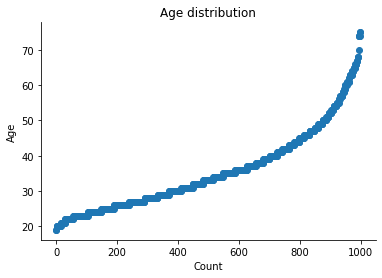

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

plt.scatter(range(DS_2_cluster.shape[0]), np.sort(DS_2_cluster['Age'].values))
plt.xlabel('Count')
plt.ylabel('Age')
plt.title("Age distribution")
sns.despine()



Skewness: 1.020739
Kurtosis: 0.595780


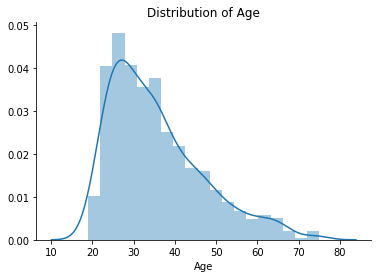

In [23]:
sns.distplot(DS_2_cluster['Age'])
plt.title("Distribution of Age")
sns.despine()
print("Skewness: %f" % DS_2_cluster['Age'].skew())
print("Kurtosis: %f" % DS_2_cluster['Age'].kurt())

## Univariate detection Isolation Forest

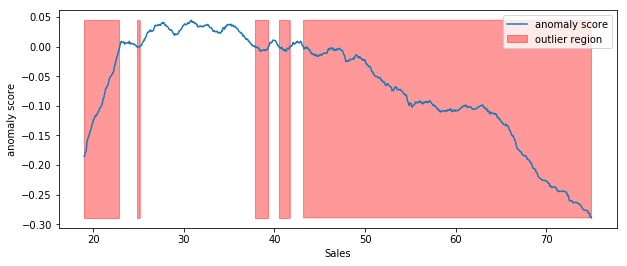

In [74]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(DS_2_cluster['Age'].values.reshape(-1, 1))
xx = np.linspace(DS_2_cluster['Age'].min(), DS_2_cluster['Age'].max(), len(DS_2_cluster)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

## Gaussian Mixture Model

[[-0.09072547  0.75705126  0.87306474]
 [-0.64985824 -0.44892516 -0.3942144 ]
 [ 1.0008822  -0.38863652 -0.6156925 ]]


[[[7.61549448e-01 5.11941471e-02 4.01536560e-02]
  [5.11941471e-02 6.60205414e-01 2.89262627e-01]
  [4.01536560e-02 2.89262627e-01 3.93727687e-01]]

 [[3.61801272e-01 7.79807342e-02 2.86787602e-02]
  [7.79807342e-02 5.66871280e-01 2.42444859e-01]
  [2.86787602e-02 2.42444859e-01 5.99057857e-01]]

 [[5.94353089e-01 1.06927871e-04 1.05898800e-01]
  [1.06927871e-04 8.55623799e-01 2.25911301e-01]
  [1.05898800e-01 2.25911301e-01 7.48424258e-01]]]
 Guassioan Mixture Models


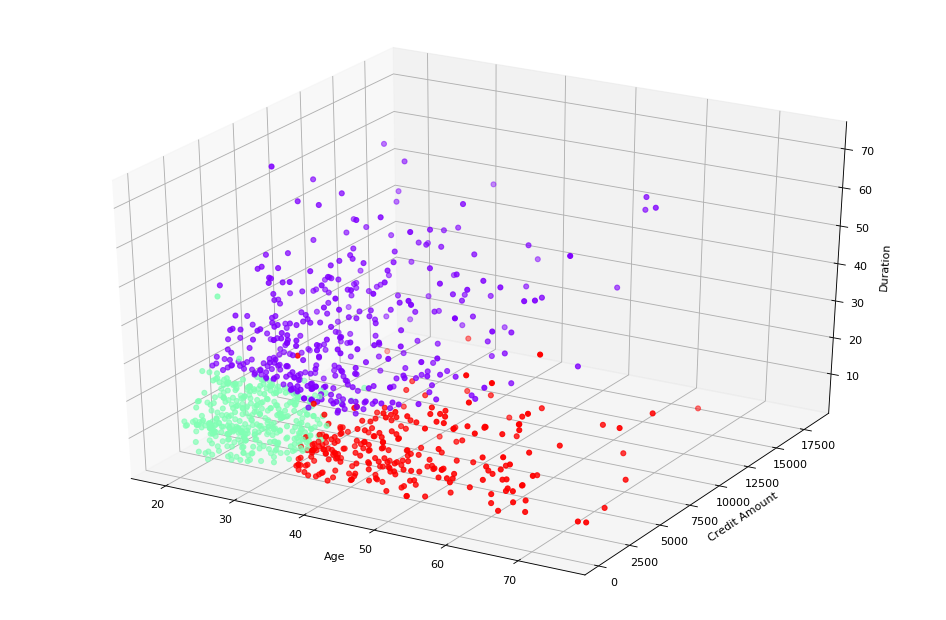

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

#split the data into train and test
X_train = cluster_scaled

#try without covariance full
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42 )
gmm.fit(X_train)


print(gmm.means_)
print('\n')
print(gmm.covariances_)


labels = gmm.predict(X_train)
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_cluster['Age'],DS_2_cluster['Credit amount'],DS_2_cluster['Duration'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print(" Guassioan Mixture Models") 

## Multivariate Anamoly Detection using Gaussian Mixture Models

In [76]:
score = gmm.predict_proba(X_train)

scores = pd.DataFrame(score)
labels = gmm.predict(X_train)
labels = pd.DataFrame(labels)
labels.rename(columns={0 : 'label'}, inplace=True)
label_scores=pd.concat([labels,scores],axis=1)

#threshhold probability is set to be 0.6 all points in a cluster less than 0.6 probability are decided as outliers
label_zero = label_scores.loc[label_scores['label'] == 0]
label_zero = label_zero.drop([1, 2], axis=1)
outlier_C0 = label_zero.loc[label_zero[0] <= 0.6]

label_one = label_scores.loc[label_scores['label'] == 1]
label_one = label_one.drop([0, 2], axis=1)
outlier_C1 = label_one.loc[label_one[1] <= 0.6]

label_two = label_scores.loc[label_scores['label'] == 2]
label_two =label_two.drop([1, 0], axis=1)
outlier_C2 = label_two.loc[label_two[2] <= 0.6]

#investigating the outlier points
print(outlier_C0.head())
out_index_C0 = list(outlier_C0.index)
out_points_C0=DS_2_cluster.iloc[ out_index_C0 , : ]
print(out_points_C0.head(5))

print(outlier_C1.head())
out_index_C1 = list(outlier_C1.index)
out_points_C1=DS_2_cluster.iloc[ out_index_C1 , : ]
print(out_points_C1.head(5))

print(outlier_C2.head())
out_index_C2 = list(outlier_C2.index)
out_points_C2=DS_2_cluster.iloc[ out_index_C2 , : ]
print(out_points_C2.head(5))



     label         0
4        0  0.562901
32       0  0.467269
64       0  0.577756
100      0  0.449163
101      0  0.586085
     Credit amount  Age  Duration  Job
4             4870   53        24    2
32            5866   30        18    2
64            3181   26        24    2
100           1469   41        24    1
101           2323   24        36    2
    label         1
30      1  0.451361
37      1  0.382710
50      1  0.505679
53      1  0.575451
97      1  0.513363
    Credit amount  Age  Duration  Job
30           1913   36        18    2
37           2100   37        18    2
50           2333   29        24    1
53           3378   31        18    2
97           2622   34        18    2
     label         2
6        2  0.563833
28       2  0.542233
38       2  0.548556
135      2  0.572148
159      2  0.570084
     Credit amount  Age  Duration  Job
6             2835   53        24    2
28            2415   34         7    2
38            1225   37        10    2
135       